<a href="https://colab.research.google.com/github/thisisSHAX/ML_Ops_Project-/blob/main/Data_Splitting_%26_Storing_in_Different_Formats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')

In [3]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

### Feature Set Selection

In [6]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

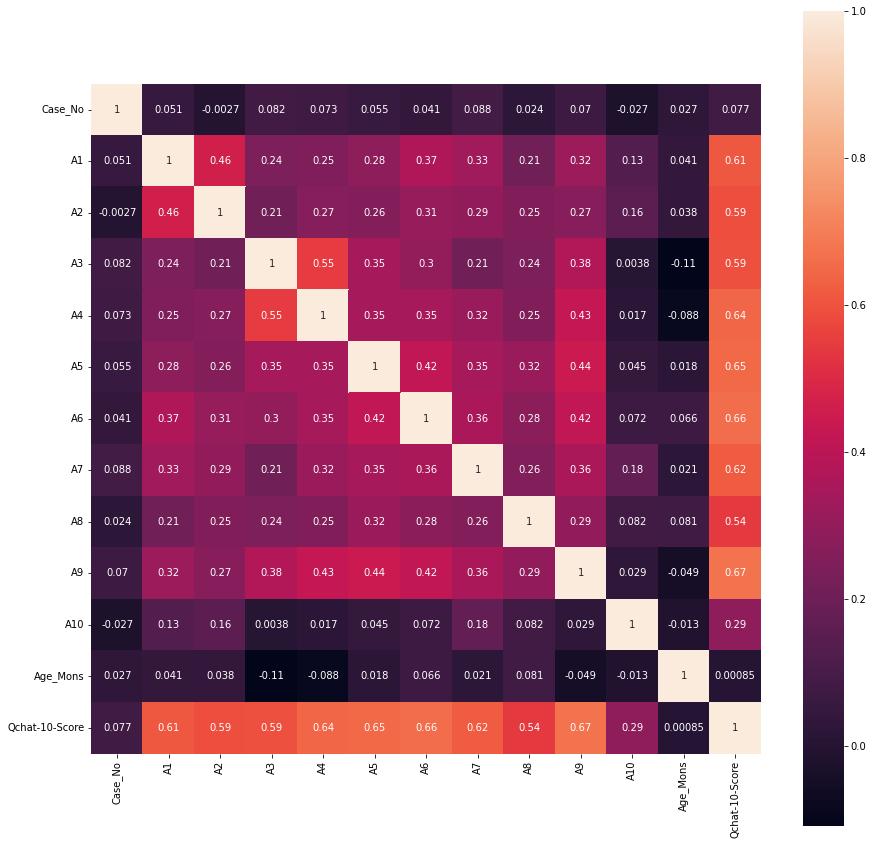

In [7]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

Qchat-10-Score has high correlation with A1 to A9. Hence, we can drop this feature

In [8]:
x_columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [9]:
cat_features = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [10]:
num_features = list(set(x_columns) - set(cat_features))

In [11]:
num_features

['Age_Mons']

In [12]:
df[x_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Sex                  1054 non-null   object
 12  Ethnicity            1054 non-null   object
 13  Jaundice             1054 non-null   object
 14  Family_mem_with_ASD  1054 non-null   object
dtypes: int64(11), object(4)
memory usage: 123.6+ KB


### Encode Categorical Variables

In [13]:
# One hot encoding
#encoded_df = pd.get_dummies(df[x_columns], columns=cat_features)
encoded_df = pd.get_dummies(df[x_columns], columns=cat_features, drop_first = True)

In [14]:
encoded_df.sample(5)

,Age_Mons,A1_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,A8_1,A9_1,A10_1,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes
669,14,1,1,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
528,31,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
803,13,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1
30,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
467,13,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1


In [15]:
x_features = list(encoded_df.columns)

In [16]:
encoded_df.shape

(1054, 24)

### Data Splitting

In [17]:
X = encoded_df

In [18]:
Y = pd.get_dummies(df['Class/ASD Traits '], drop_first=True)

In [19]:
X

,Age_Mons,A1_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,A8_1,A9_1,A10_1,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes
0,28,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,36,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,36,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
3,24,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,20,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1050,12,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1051,18,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
1052,19,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1


In [20]:
Y

,Yes
0,0
1,1
2,1
3,1
4,1
...,...
1049,0
1050,1
1051,1
1052,0


In [21]:
#Checking imbalance
Y.sum()/len(Y)

Yes    0.690702
dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Splitting
train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)

train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [24]:
# Splitting after One - Hot Encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_prod, Y_train, Y_prod = train_test_split(X_train, Y_train, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [25]:
X_train['Age_Mons'].shape

(632,)

In [26]:
X_test.shape

(211, 24)

In [27]:
X_prod.shape

(211, 24)

In [28]:
Y_train.shape

(632, 1)

## Saving in different formats

In [29]:
import os

In [30]:
#Without Encoding
train_X.to_csv("./sample_data/train_x.csv")
test_X.to_csv("./sample_data/test_x.csv")
prod_X.to_csv("./sample_data/prod_x.csv")

In [31]:
#With Encoding
X_train.to_csv("./sample_data/x_train.csv")
X_test.to_csv("./sample_data/x_test.csv")
X_prod.to_csv("./sample_data/x_prod.csv")

In [32]:
#pickle
train_X.to_pickle("./sample_data/train_x.pkl")
test_X.to_pickle("./sample_data/test_x.pkl")
prod_X.to_pickle("./sample_data/prod_x.pkl")

In [33]:
#parquet
train_X.to_parquet("./sample_data/train_x.parquet")
test_X.to_parquet("./sample_data/test_x.parquet")
prod_X.to_parquet("./sample_data/prod_x.parquet")

In [34]:
#pickle with encoding
X_train.to_pickle("./sample_data/x_train.pkl")
X_test.to_pickle("./sample_data/x_test.pkl")
X_prod.to_pickle("./sample_data/x_prod.pkl")

In [35]:
#parquet with encoding
X_train.to_parquet("./sample_data/x_train.parquet")
X_test.to_parquet("./sample_data/x_test.parquet")
X_prod.to_parquet("./sample_data/x_prod.parquet")

In [36]:
ls -al sample_data

total 55912
drwxr-xr-x 1 root root     4096 Nov 25 07:40 ./
drwxr-xr-x 1 root root     4096 Nov 18 14:36 ../
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json*
-rw-r--r-- 1 root root   301141 Nov 18 14:36 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Nov 18 14:36 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Nov 18 14:36 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Nov 18 14:36 mnist_train_small.csv
-rw-r--r-- 1 root root     9836 Nov 25 07:40 prod_x.csv
-rw-r--r-- 1 root root    12665 Nov 25 07:40 prod_x.parquet
-rw-r--r-- 1 root root    23007 Nov 25 07:40 prod_x.pkl
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md*
-rw-r--r-- 1 root root     9910 Nov 25 07:40 test_x.csv
-rw-r--r-- 1 root root    12628 Nov 25 07:40 test_x.parquet
-rw-r--r-- 1 root root    22987 Nov 25 07:40 test_x.pkl
-rw-r--r-- 1 root root    29409 Nov 25 07:40 train_x.csv
-rw-r--r-- 1 root root    16157 Nov 25 07:40 train_x.parquet
-rw-r--r-- 1 root root    66807 Nov 25 

In [37]:
filenames = ['./sample_data/train_x.csv',
             './sample_data/train_x.pkl', 
             './sample_data/train_x.parquet',
             './sample_data/x_train.csv',
             './sample_data/x_train.pkl', 
             './sample_data/x_train.parquet'
            ]

all_filesizes = [os.path.getsize(f) for f in filenames]             
 
filescompare_df = pd.DataFrame( { "formats" : filenames,
                                  "filesize": all_filesizes})

In [38]:
filescompare_df

,formats,filesize
0,./sample_data/train_x.csv,29409
1,./sample_data/train_x.pkl,66807
2,./sample_data/train_x.parquet,16157
3,./sample_data/x_train.csv,33775
4,./sample_data/x_train.pkl,25878
5,./sample_data/x_train.parquet,21823


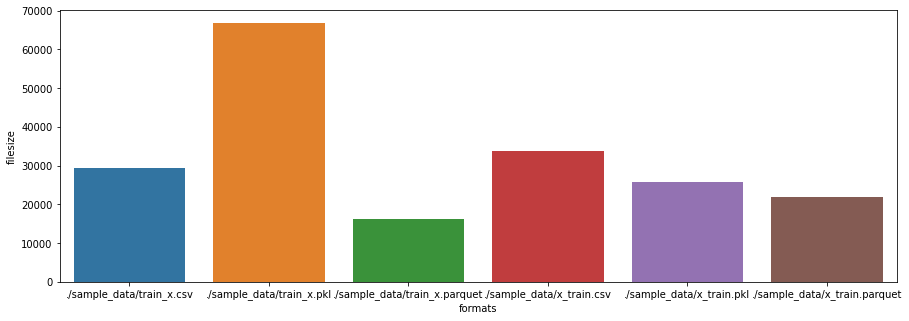

In [39]:
plt.figure( figsize = (15, 5) )
sns.barplot( data = filescompare_df,
           x = 'formats',
           y = 'filesize');

## Read time benchmarking of different formats

In [40]:
%%time 

train_pkl_df = pd.read_pickle("./sample_data/train_x.pkl")

CPU times: user 1.91 ms, sys: 0 ns, total: 1.91 ms
Wall time: 1.92 ms


In [41]:
%%time 

train_parquet_df = pd.read_parquet("./sample_data/train_x.parquet")

CPU times: user 12 ms, sys: 5.78 ms, total: 17.8 ms
Wall time: 48.8 ms


In [42]:
%%time 

train_csv_df = pd.read_csv("./sample_data/train_x.csv")

CPU times: user 4.96 ms, sys: 992 µs, total: 5.95 ms
Wall time: 10.4 ms


In [43]:
filenames2 = ['./sample_data/train_x.csv',
             './sample_data/train_x.pkl', 
             './sample_data/train_x.parquet'
            ]          
 
filescompare2_df = pd.DataFrame( { "formats" : filenames2})

In [44]:
import time

t1 = time.perf_counter()
train_df = pd.read_csv("./sample_data/train_x.csv")
time_csv = time.perf_counter() - t1

t1 = time.perf_counter()
train_pkl_df = pd.read_pickle("./sample_data/train_x.pkl")
time_pkl = time.perf_counter() - t1

t1 = time.perf_counter()
train_parquet_df = pd.read_parquet("./sample_data/train_x.parquet")
time_parquet = time.perf_counter() - t1

In [45]:
time_csv

0.007394943000008425

In [46]:
filescompare2_df['read_time'] = [time_csv, time_pkl, time_parquet]

In [47]:
filescompare2_df

,formats,read_time
0,./sample_data/train_x.csv,0.007395
1,./sample_data/train_x.pkl,0.001778
2,./sample_data/train_x.parquet,0.006457


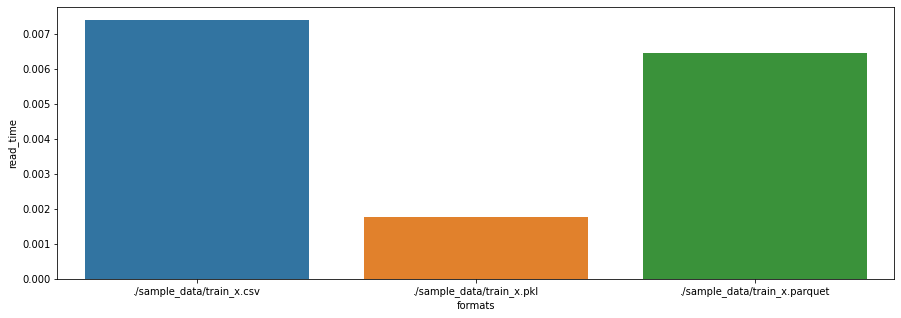

In [48]:
plt.figure( figsize = (15, 5) )
sns.barplot( data = filescompare2_df,
           x = 'formats',
           y = 'read_time');